<a href="https://colab.research.google.com/github/Rutuja-Shukla/Stock-Predicction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction

Goal : Determine the future value of a company stock. The successful prediction 

of a stock's future price could yeild significant profit

Description :
The historical data of Google Stock Price is used to predict the value of future stock.

The dataset used in this project can be downloaded using the link given below

Dataset : https://drive.google.com/drive/folders/1GVB0WnbdFkYXJoRfx5FljOP6x2t85Cd3?usp=sharing

# Import Libraries

In [ ]:
# To upload the dataset
from google.colab import drive

# For storing and manipulating data.
import numpy as np
import pandas as pd
import datetime

# For plots and charts visualization of the outcomes
import matplotlib.pyplot as plt

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Download Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/PROJECTS/Stock Predicion/Dataset/Google_Stock_Price_Train.csv'
path2 = '/content/drive/MyDrive/PROJECTS/Stock Predicion/Dataset/Google_Stock_Price_Test.csv'
dataset_train = pd.read_csv(path1)
dataset_test = pd.read_csv(path2)

# Data Analysis

In [ ]:
#View the train dataset
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
#Information of the train dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
# Convert the datatype of columns from 'object' to 'float'
dataset_train["Close"] = dataset_train["Close"].str.replace(',', '').astype(float)
dataset_train["Volume"] = dataset_train["Volume"].str.replace(',', '').astype(float)

In [ ]:
# Updated Information of the train dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


# Visualize the Dataset

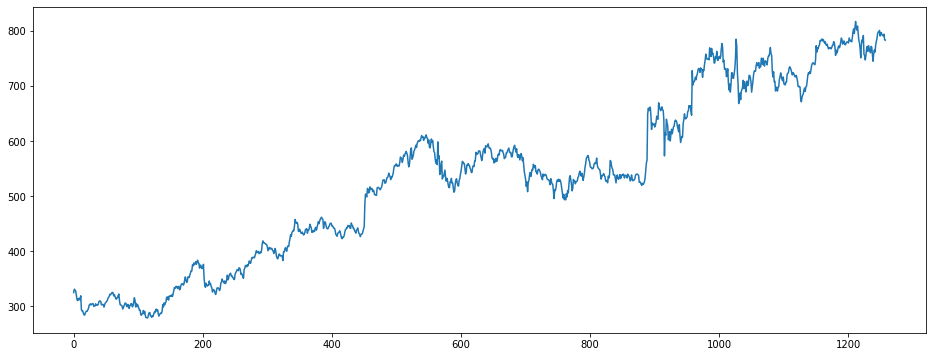

In [ ]:
#Visualize the Dataset
dataset_train['Open'].plot(figsize=(16,6))

In [ ]:
# Find the 7 day rolling mean of the train dataset
dataset_train.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857,7.208100e+06
7,321.457143,322.882857,316.841429,638.037143,6.691514e+06
8,318.698571,319.801429,314.025714,631.870000,6.531857e+06
9,316.552857,317.524286,311.851429,627.534286,6.137929e+06


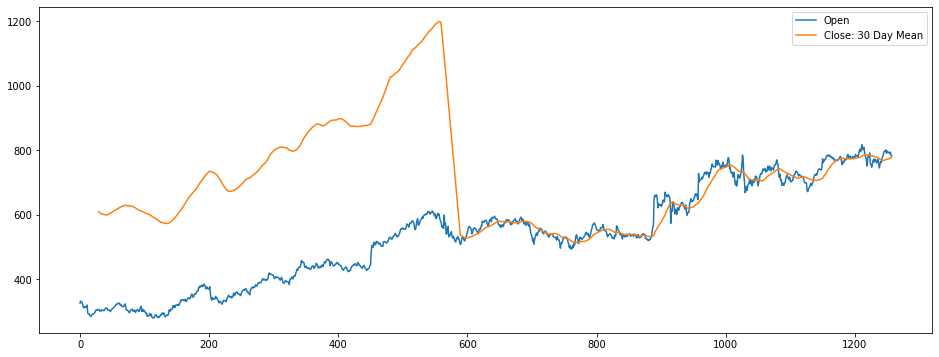

In [ ]:
# Visualize the 'Close' 30 day rolling mean data + original 'Open' stock price
dataset_train['Close: 30 Day Mean'] = dataset_train['Close'].rolling(window=30).mean()
dataset_train[['Open','Close: 30 Day Mean']].plot(figsize=(16,6))

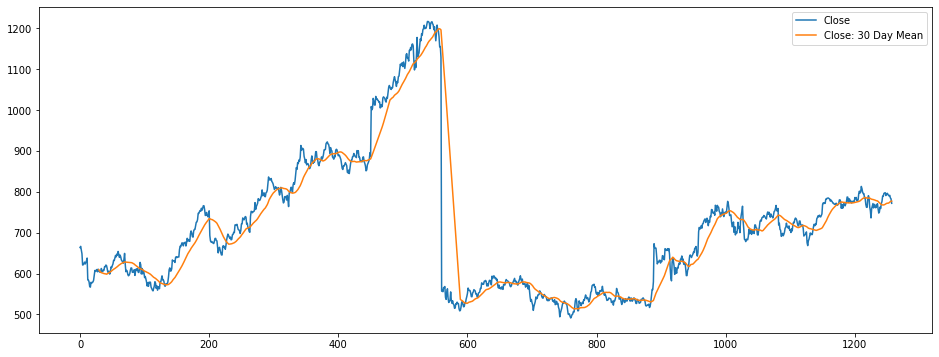

In [ ]:
# Visualize the 'Close' 30 day rolling mean data + original 'Close' stock price
dataset_train[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

# Create a new training set

In [ ]:
# New dataset consist of only the 'Open' stock price from original train data
training_set=dataset_train['Open']
training_set=pd.DataFrame(training_set)
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


# Feature Scaling

In [ ]:
# Feature Scaling the new train dataset
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled 

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating a  new data structure

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
# Reshaping the x_train data structure
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Build a Regression Nueral Network

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0392
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0046
Epoch 13/100


# Data Analyzing of Test Dataset

In [ ]:
#View the test dataset
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
#Information of test dataset
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [ ]:
# Convert the datatype of columns from 'object' to 'float'
dataset_test['Volume'] = dataset_test['Volume'].str.replace(',', '').astype(float)

In [ ]:
# Dataset_test High Column
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
#Create a new test set
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
# Information of the new test set
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


# Predicted stock price of 2017

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# View the information of predicted stock price
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


# Result Visualization

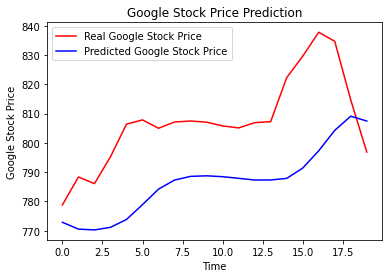

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Reference
https://www.youtube.com/watch?v=lncoLfue_Y4